In [122]:
# Create Fake Data
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


In [161]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18

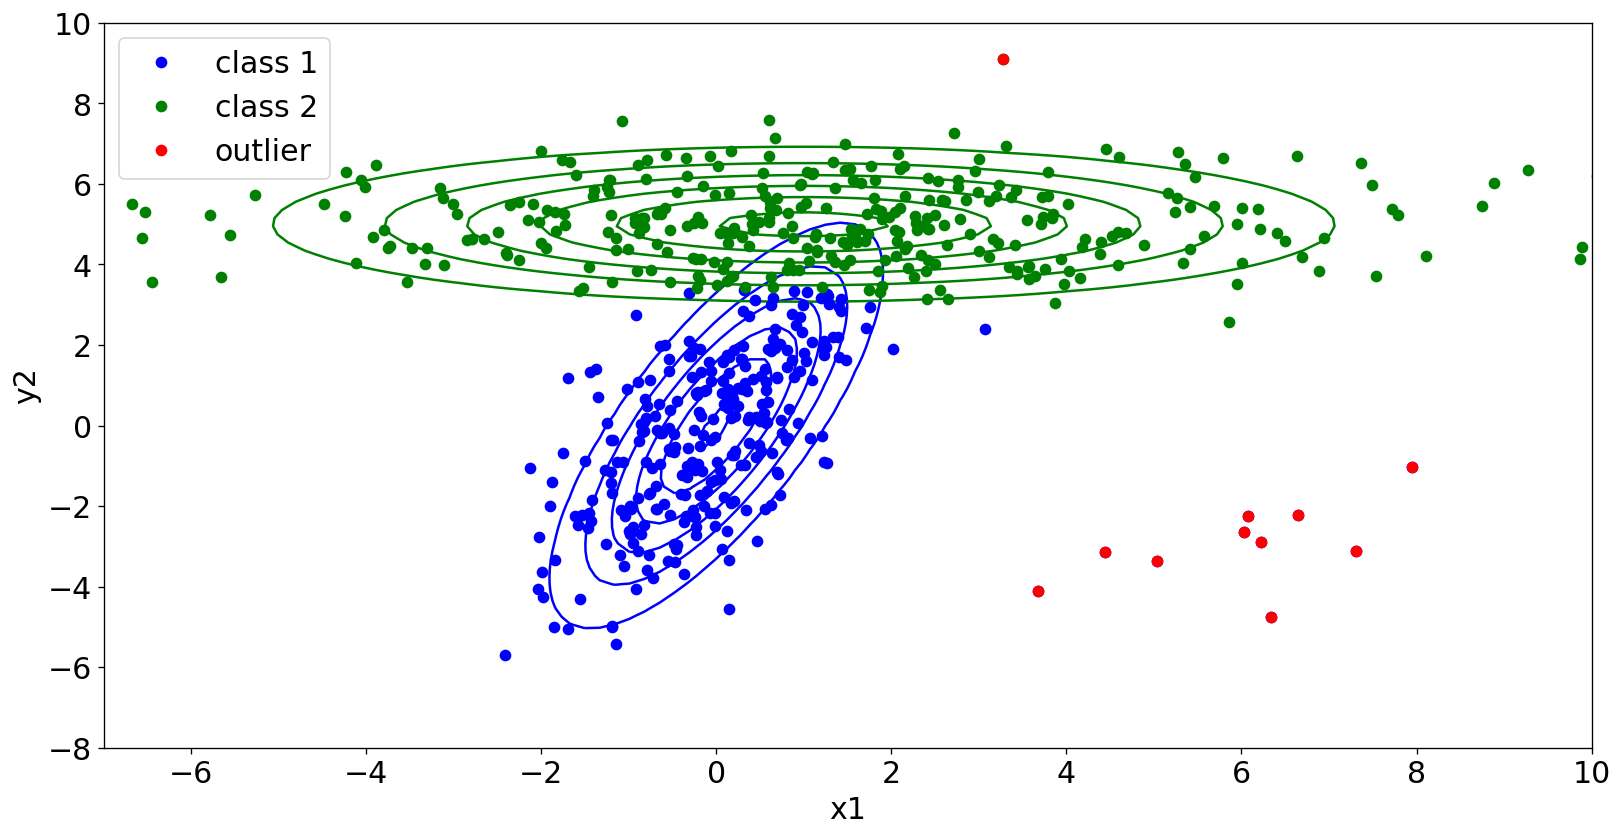

In [169]:
mu1 = np.asarray([0,0])
cov1 = np.asarray([[1,2], [2,7]])
#Now do the trick for Guassian sampling
rstate = 42 # random state to produce always the same 'random' sampling
mv1 = multivariate_normal(mu1, cov1)
X1 = mv1.rvs(size = 300) # Initialize Multivariate Gaussian 1
#X = mv1.rvs(size=1000, )
mu2 = np.asarray([1,5])
cov2 = np.asarray([[10,0], [0,1]])
mv2 = multivariate_normal(mu2, cov2)
X2 = mv2.rvs(size = 300) # Initialize Multivariate Gaussian 1
mu3 = np.asarray([6,-3])
cov3 = np.asarray([[1,0], [0,1]])
mv3 = multivariate_normal(mu3, cov3)
X3 =  mv3.rvs(size = 10)
X = np.concatenate([X1,X2,X3])

gmm = GaussianMixture(n_components=2, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, \
             n_init=1, init_params='kmeans', weights_init=None, means_init=None)
gmm.fit(X)
a = np.exp(gmm.score_samples(X))
pred = gmm.predict(X)

X3 = X[a<0.0001]
X1 = X[pred==1]
X2 = X[pred==0]

x = np.linspace(-7,10,100)
y = np.linspace(-10,10,100)
xx,yy = np.meshgrid(x,y)
pos = np.dstack((xx,yy))
zz1 = mv1.pdf(pos)
zz2 = mv2.pdf(pos)
zz3 = mv3.pdf(pos)
zz = zz1+zz2+zz3

# Contour Plot
fig2 = plt.figure(2,figsize=(16,8), dpi=120)
ax2 = fig2.add_subplot(111)
ax2.contour(xx, yy, zz1, colors='b')
ax2.contour(xx, yy, zz2, colors='g')
#ax2.contour(xx, yy, zz3)


plt.xlabel('x1')
plt.ylabel('y2')

# Scatter Plot
plt.plot(X1[:,0], X1[:,1],'bo',label='class 1')
plt.plot(X2[:,0], X2[:,1], 'go',label='class 2')
plt.plot(X3[:,0], X3[:,1],'ro',label='outlier')
plt.xlim([-7,10])
plt.ylim([-8, 10])
plt.legend()
plt.show()

In [73]:
# PLOTTING

import matplotlib.pyplot as plt

# PLOT PART 1

# Contour Plot
fig2 = plt.figure(figsize=(16,8), dpi=120)
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, z)
plt.xlabel('x1')
plt.ylabel('y2')
plt.show()
fig2.savefig('ContourPlot')

#plt.title('ContourPlot of p(x1x2|x3x4)')
# 3D Plot
from mpl_toolkits.mplot3d import Axes3D
fig3 = plt.figure(figsize=(16,8), dpi=120)
ax = fig3.add_subplot(111, projection='3d')
#ax = Axes3D(fig)
ax.plot_surface(x,y,z)
#ax.plot(XN, YN, path,'y')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('probability')
#plt.zlabel('probabilty')
plt.show()
fig3.savefig('SurfacePlot')

# PLOT PART 2
# Contour Plot of How MU evolves in time by ML estimation
XN = MU[:,0]
YN = MU[:,1]

fig4 = plt.figure(figsize=(16,8), dpi=120)
ax4 = fig4.add_subplot(111)
ax4.contourf(x, y, z)
ax4.plot(XN,YN, 'y')

plt.xlabel('x1')
plt.ylabel('y2')
plt.show()
fig4.savefig('muML')

# PLOT PART 3
# The same plots for Bayesian Approach

(10, 2, 1000)

In [61]:
gauss = lambda x: mv.pdf(x)